## 1) Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

## 2) Read and explore dataset

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.shape

(569, 33)

## 3) Data Analysis and Visualization

<AxesSubplot:>

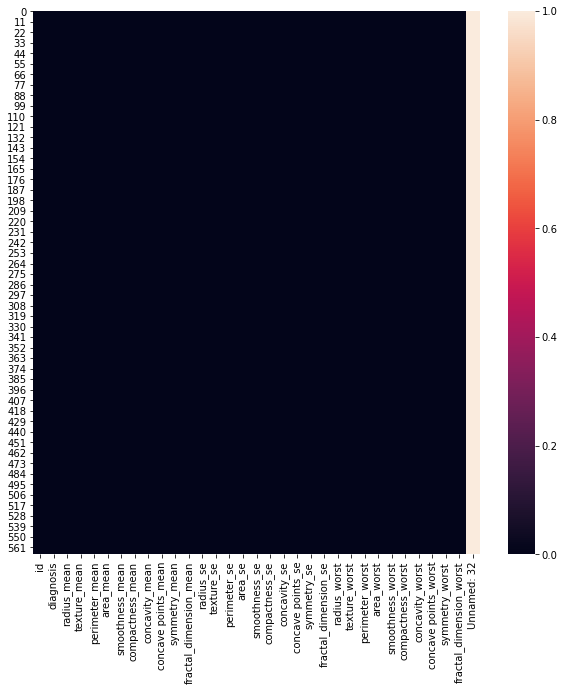

In [4]:
plt.figure(figsize=(10,10))
sn.heatmap(dataset.isnull())

We can see that id and Unnamed:32 has all the NaN values ! So we will drop this column

In [5]:
dataset.drop(labels=["id","Unnamed: 32"], axis=1, inplace=True)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

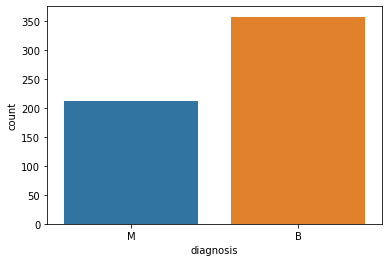

In [6]:
sn.countplot(dataset["diagnosis"])

In [7]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

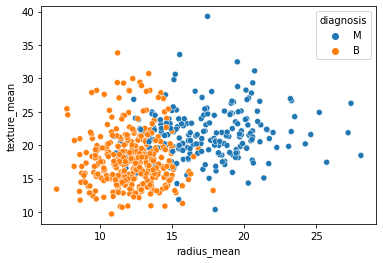

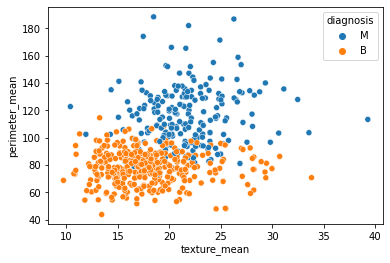

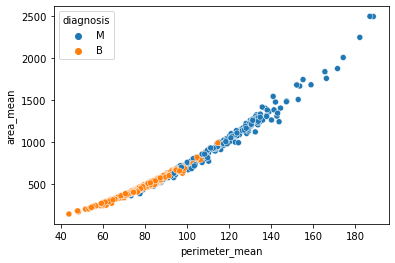

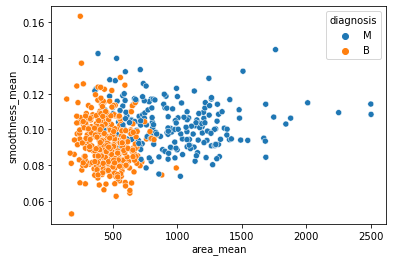

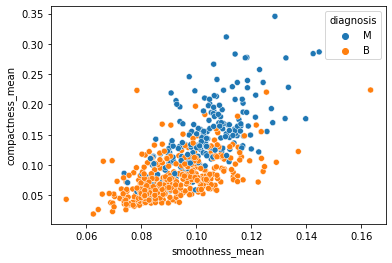

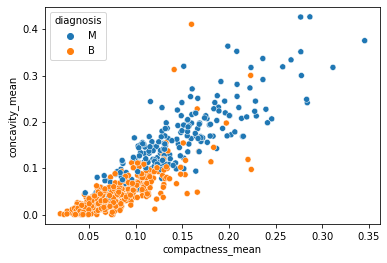

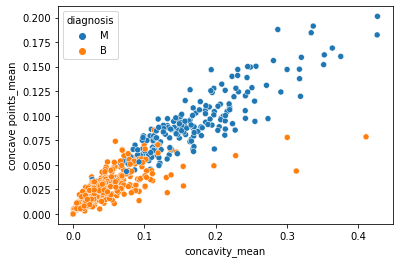

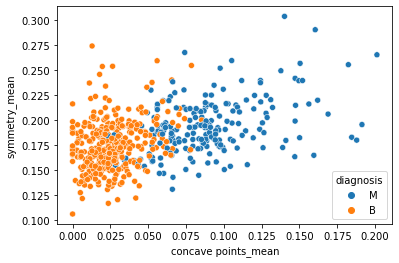

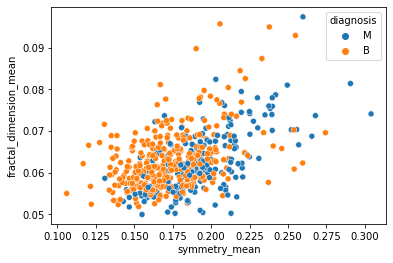

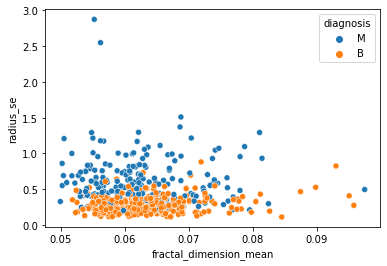

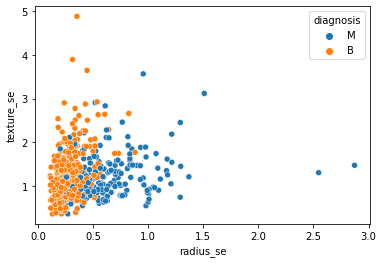

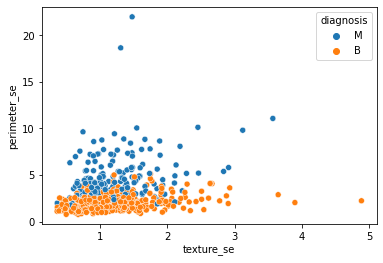

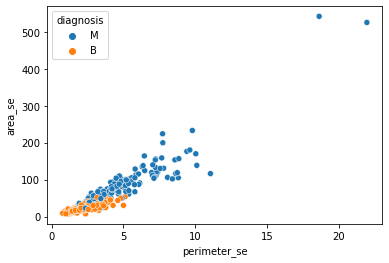

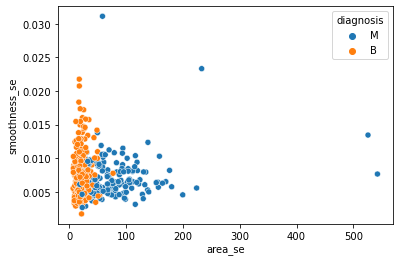

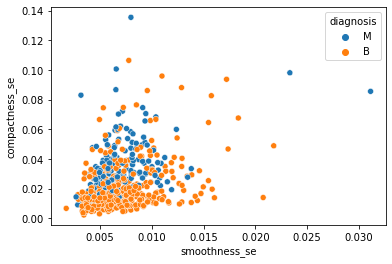

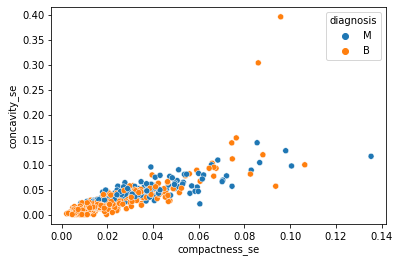

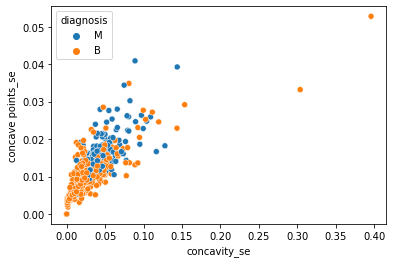

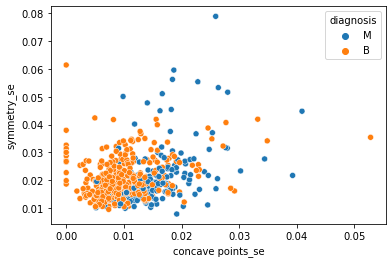

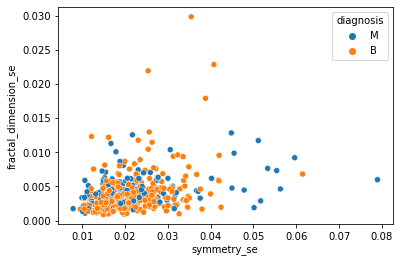

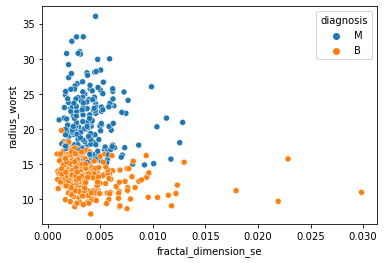

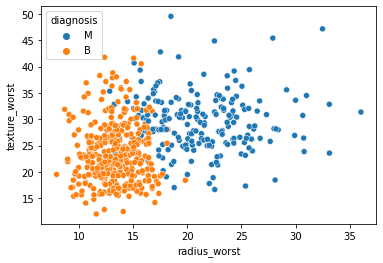

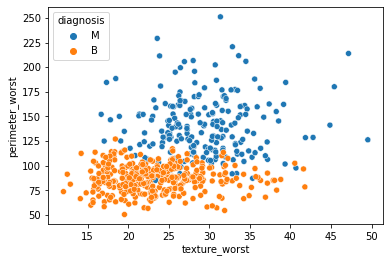

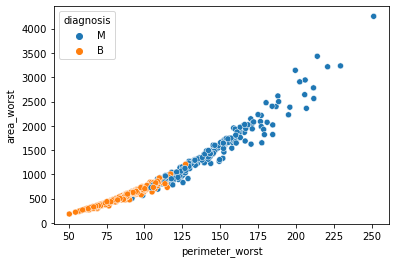

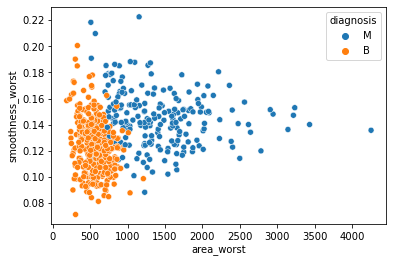

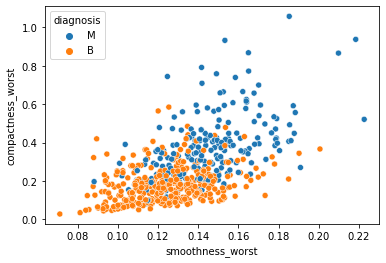

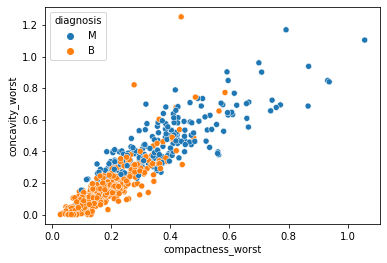

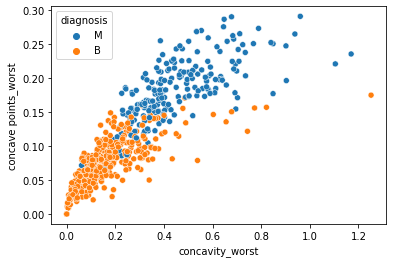

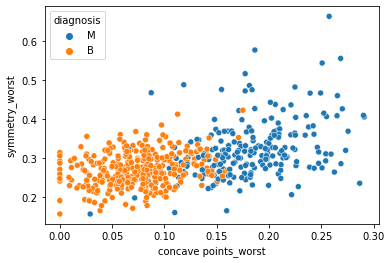

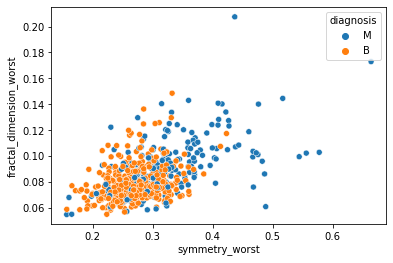

In [8]:
for i in range(1, len(dataset.columns)-1):
    sn.scatterplot(x = dataset[dataset.columns[i]], y = dataset[dataset.columns[i+1]], hue=dataset["diagnosis"], )
    plt.show()

`From the above scatter plots we can see:
1. perimeter_worst and area_worst are higly positive correlated.
2. Concave points mean and concave_points_mean are higly positive correlated.
3. compactness_mean and concavity_mean are highly correlated.
4. Area_mean and perimeter_mean are highly correlated.
5. Area_se and perimeter_se are highly correlated.

## 4) Feature Selection

### Univariate Feature Selection 

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
#Dependent and Independent Feature
X = dataset.drop(labels = ["diagnosis"], axis=1)
y = dataset["diagnosis"]
#Converting categorical features to numeric
y = y.map({"M":0,"B":1})

I am seeing top 30 features according to kBest scores to get clarity about the dataset.

In [11]:
kbest = SelectKBest(score_func=chi2, k=30).fit(X,y)

In [12]:
dfscore = pd.DataFrame(kbest.scores_)
dfcol = pd.DataFrame(X.columns)
corr_frame = pd.concat([dfcol, dfscore],axis=1)
corr_frame.columns = ["Features","Scores"]
corr_frame

,Features,Scores
0,radius_mean,266.104917
1,texture_mean,93.897508
2,perimeter_mean,2011.102864
3,area_mean,53991.655924
4,smoothness_mean,0.149899
5,compactness_mean,5.403075
6,concavity_mean,19.712354
7,concave points_mean,10.544035
8,symmetry_mean,0.257380
9,fractal_dimension_mean,0.000074


Extracting top 20 features...

In [13]:
corr_frame.nlargest(20, "Scores")

,Features,Scores
23,area_worst,112598.431564
3,area_mean,53991.655924
13,area_se,8758.504705
22,perimeter_worst,3665.035416
2,perimeter_mean,2011.102864
20,radius_worst,491.689157
0,radius_mean,266.104917
12,perimeter_se,250.571896
21,texture_worst,174.449400
1,texture_mean,93.897508


## 5) Finding the correlation between features

In [14]:
correlation = dataset.corr()
corr_85 = correlation[correlation>0.85]
corr_85

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,NaN,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,0.850977,NaN,NaN,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.883121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.865809,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.883121,1.000000,0.921391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.884103,0.861323,NaN,NaN
concave points_mean,NaN,NaN,0.850977,NaN,NaN,NaN,0.921391,1.000000,NaN,NaN,...,NaN,NaN,0.855923,NaN,NaN,NaN,NaN,0.910155,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drawing heatMap will give us more good observation about correlation.

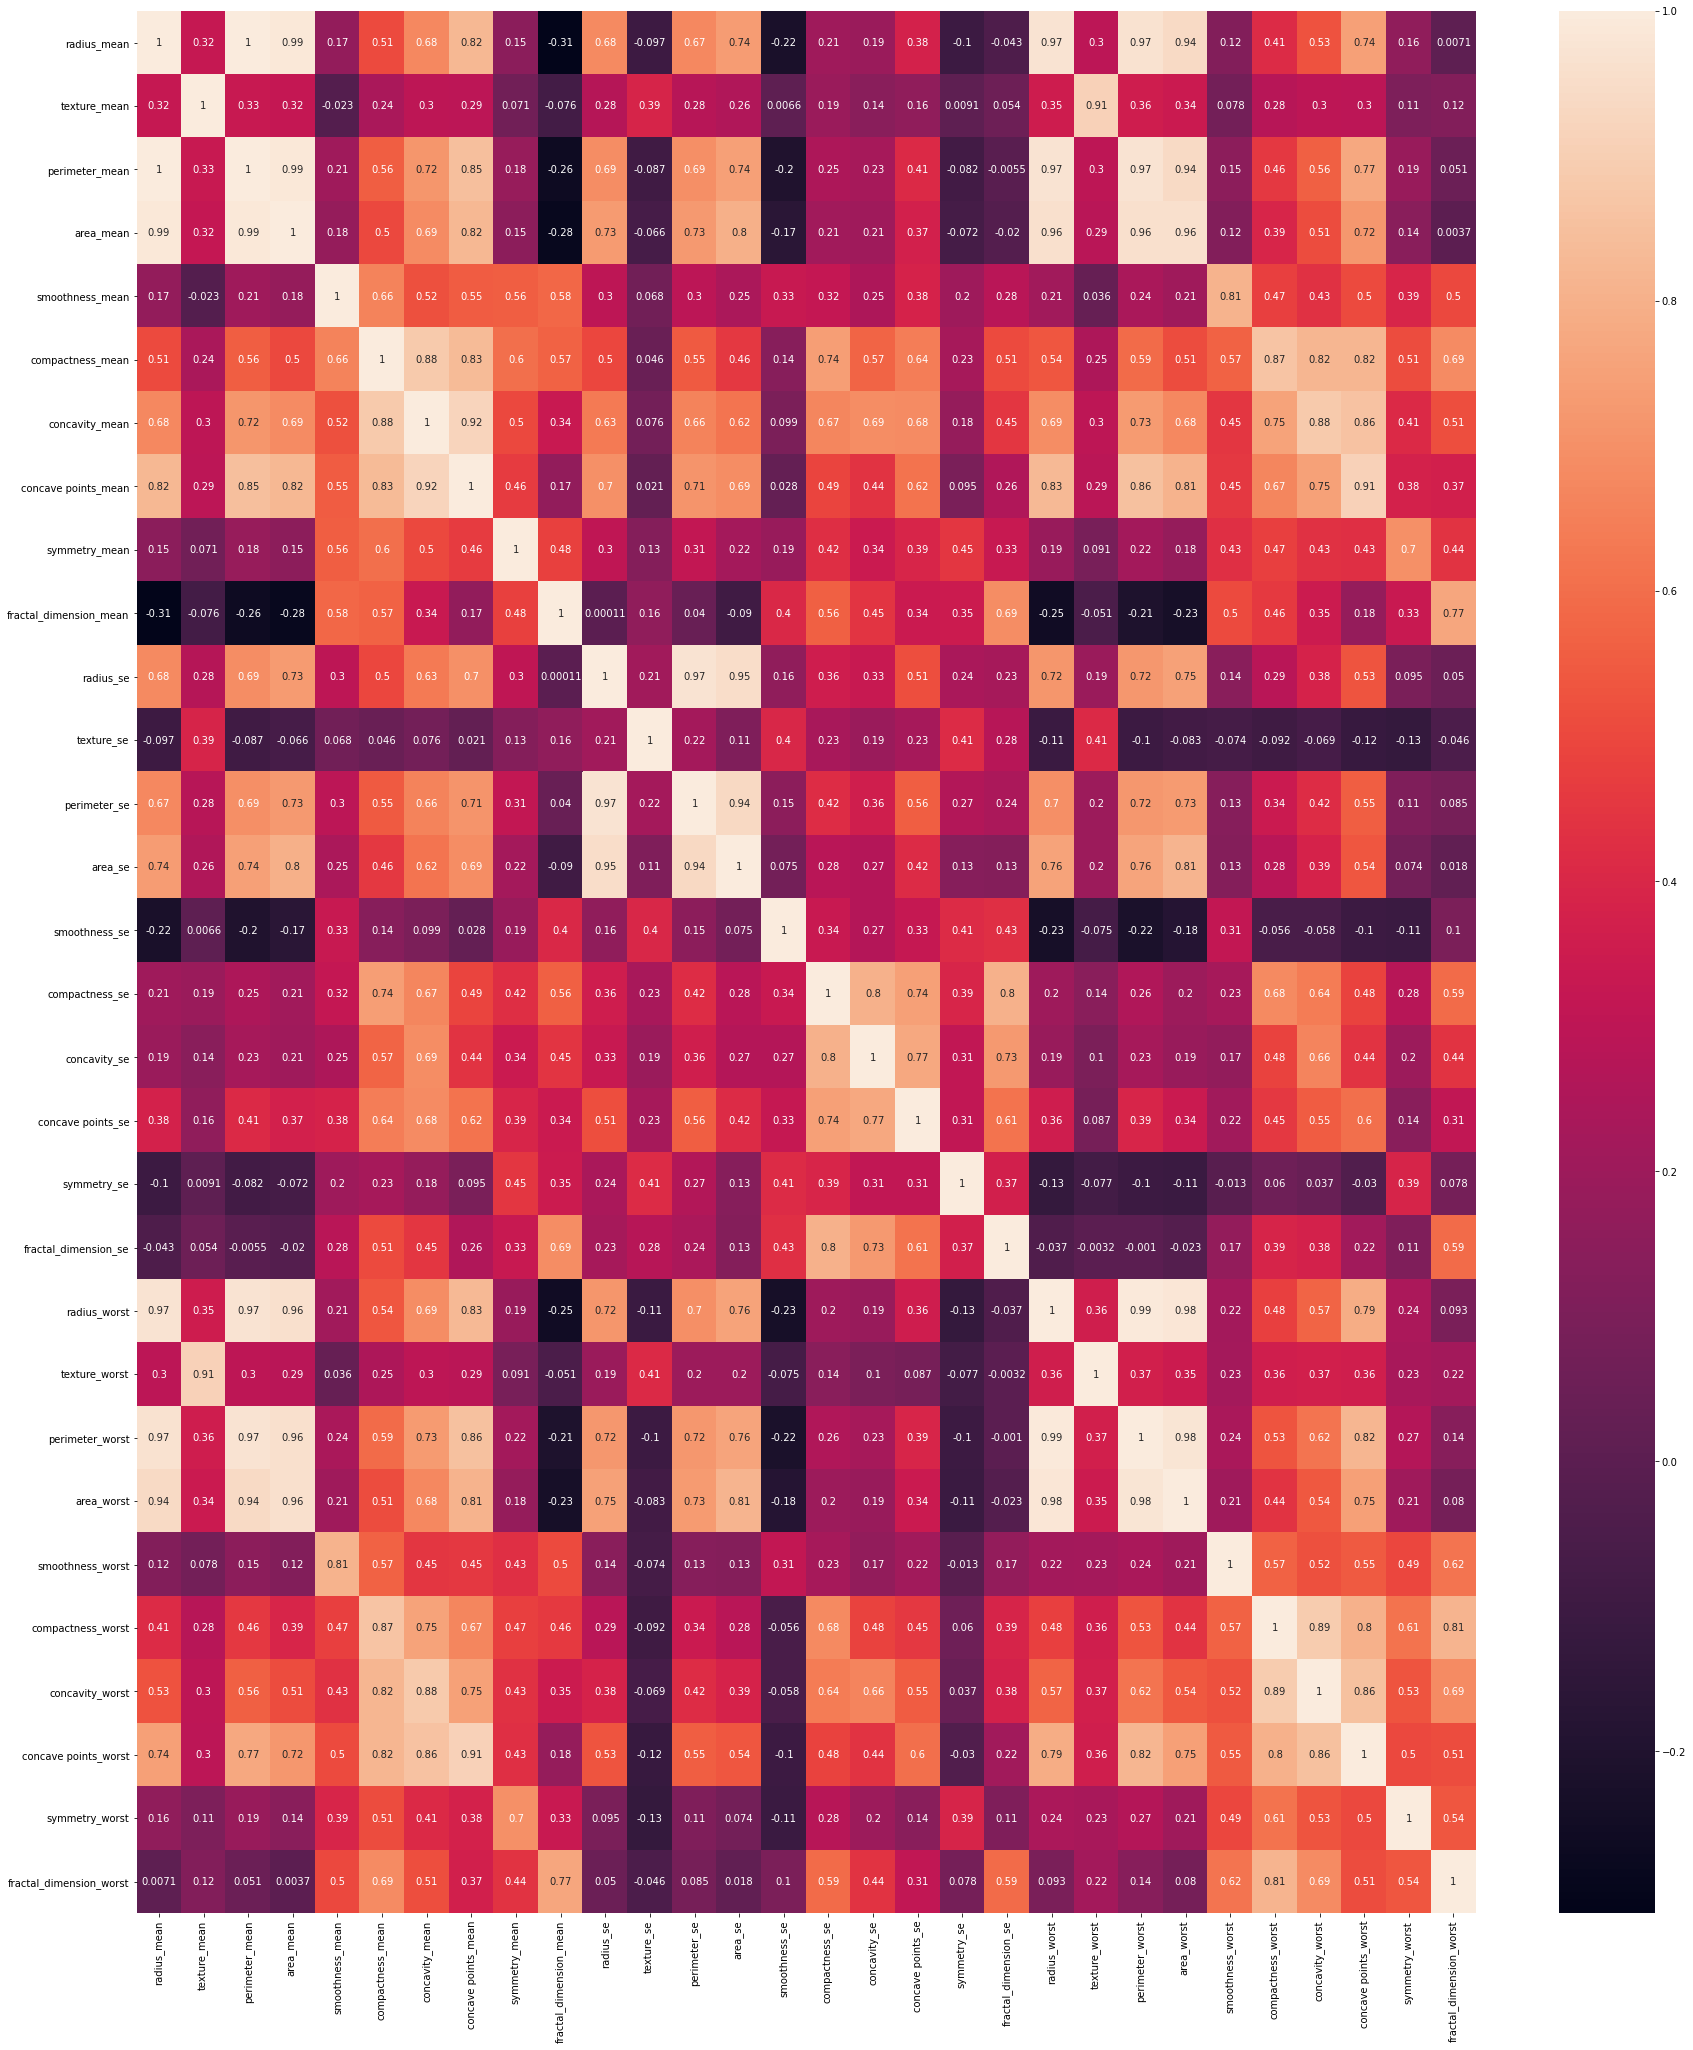

In [15]:
plt.figure(figsize=(30, 35))
sn.heatmap(correlation,annot=True)
plt.show()

The below mentioned code will help us to know which features are having high correlation among themselves.

In [16]:
co_related = set()

for ele in range(len(correlation.columns)):
    for j in range(ele,len(correlation.columns)):
        if ele != j and correlation.iloc[ele,j] > 0.85:
            print(correlation.columns[ele], "->",correlation.columns[j])
            co_related.add(correlation.columns[j])
print(co_related)

radius_mean -> perimeter_mean
radius_mean -> area_mean
radius_mean -> radius_worst
radius_mean -> perimeter_worst
radius_mean -> area_worst
texture_mean -> texture_worst
perimeter_mean -> area_mean
perimeter_mean -> concave points_mean
perimeter_mean -> radius_worst
perimeter_mean -> perimeter_worst
perimeter_mean -> area_worst
area_mean -> radius_worst
area_mean -> perimeter_worst
area_mean -> area_worst
compactness_mean -> concavity_mean
compactness_mean -> compactness_worst
concavity_mean -> concave points_mean
concavity_mean -> concavity_worst
concavity_mean -> concave points_worst
concave points_mean -> perimeter_worst
concave points_mean -> concave points_worst
radius_se -> perimeter_se
radius_se -> area_se
perimeter_se -> area_se
radius_worst -> perimeter_worst
radius_worst -> area_worst
perimeter_worst -> area_worst
compactness_worst -> concavity_worst
concavity_worst -> concave points_worst
{'concave points_mean', 'compactness_worst', 'area_se', 'area_worst', 'perimeter_worst'

As we know that if our Dataset will contain highly correlated features, then it will not be able to learn properly,
So we will drop the columns that are correlated keeping the main features in dataset

In [17]:
#Droping related columns
X.drop(labels=co_related, axis=1, inplace=True)
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In this columns, when we took out the kBest scores, some were not having good scores,
so what I will do is that I will drop them off too..

In [18]:
corr_frame.sort_values(by = 'Scores').reset_index()

,index,Features,Scores
0,9,fractal_dimension_mean,0.000074
1,18,symmetry_se,0.000080
2,14,smoothness_se,0.003266
3,19,fractal_dimension_se,0.006371
4,11,texture_se,0.009794
5,4,smoothness_mean,0.149899
6,29,fractal_dimension_worst,0.231522
7,8,symmetry_mean,0.257380
8,17,concave points_se,0.305232
9,24,smoothness_worst,0.397366


We can see the top 13 indexes are having very less scores that means they are not important for our model

In [19]:
less_important_features = corr_frame.nsmallest(13,'Scores')['Features']

In [20]:
X.drop(labels=less_important_features, axis=1, inplace=True)
X

,radius_mean,texture_mean,compactness_mean,radius_se
0,17.99,10.38,0.27760,1.0950
1,20.57,17.77,0.07864,0.5435
2,19.69,21.25,0.15990,0.7456
3,11.42,20.38,0.28390,0.4956
4,20.29,14.34,0.13280,0.7572
...,...,...,...,...
564,21.56,22.39,0.11590,1.1760
565,20.13,28.25,0.10340,0.7655
566,16.60,28.08,0.10230,0.4564
567,20.60,29.33,0.27700,0.7260


## 6) Standardization and Train_test_split

In [21]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
X = sc_scale.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 10)

## 7) Model Selection

In [23]:
## All necessary model imports.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [24]:
def run_models(X_train, y_train):
    # 1. Logistic Regression.
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train, y_train)
    
    # 2. XG Boost classifier
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    # 3. Decision Tree Classifier
    decTC = DecisionTreeClassifier(random_state=0)
    decTC.fit(X_train, y_train)
    
    # 4. Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # 5. Support Vector Machine
    svc = SVC(random_state=0)
    svc.fit(X_train, y_train)
    
    # 6. Ada boost Classifier
    abc = AdaBoostClassifier(random_state=0)
    abc.fit(X_train, y_train)
    
    # 7. K Neighbors Classifier
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    
    # 8. Random Forest Classifier
    rfc = RandomForestClassifier(random_state=0)
    rfc.fit(X_train, y_train)
    
    print('\n')
    print("Scores after Training models on X_train and y_train -> ", end='\n')
    print('\n')
    print("[1]Training Accuracy using Logistic Regression: ", lr.score(X_train, y_train))
    print("[2]Training Accuracy using XG Boost classifier: ", xgb.score(X_train, y_train))
    print("[3]Training Accuracy using Decision Tree Classifier: ", decTC.score(X_train, y_train))
    print("[4]Training Accuracy using Gaussian Naive Bayes: ", gnb.score(X_train, y_train))
    print("[5]Training Accuracy using Support Vector Machine: ", svc.score(X_train, y_train))
    print("[6]Training Accuracy using Ada boost Classifier: ", abc.score(X_train, y_train))
    print("[7]Training Accuracy using K Neighbors Classifier: ", knc.score(X_train, y_train))
    print("[8]Training Accuracy using Random Forest Classifier: ", rfc.score(X_train, y_train))
    
    print('\n')
    print("Accuracy score of cross-validated models on X_train and y_train -> ", end='\n')
    print('\n')
    print("[1]Accuracy after Cross- validation using Logistic Regression: ", np.mean(cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1)))
    print("[2]Accuracy after Cross- validation using XG Boost classifier: ", np.mean(cross_val_score(xgb, X_train, y_train, cv=10, n_jobs=-1)))
    print("[3]Accuracy after Cross- validation using Decision Tree Classifier: ", np.mean(cross_val_score(decTC, X_train, y_train, cv=10, n_jobs=-1)))
    print("[4]Accuracy after Cross- validation using Gaussian Naive Bayes: ", np.mean(cross_val_score(gnb, X_train, y_train, cv=10, n_jobs=-1)))
    print("[5]Accuracy after Cross- validation using Support Vector Machine: ", np.mean(cross_val_score(svc, X_train, y_train, cv=10, n_jobs=-1)))
    print("[6]Accuracy after Cross- validation using Ada boost Classifier: ", np.mean(cross_val_score(abc, X_train, y_train, cv=10, n_jobs=-1)))
    print("[7]Accuracy after Cross- validation using K Neighbors Classifier: ", np.mean(cross_val_score(knc, X_train, y_train, cv=10, n_jobs=-1)))
    print("[8]Accuracy after Cross- validation using Random Forest Classifier: ", np.mean(cross_val_score(rfc, X_train, y_train, cv=10, n_jobs=-1)))
    
    return lr, xgb, decTC, gnb, svc, abc, knc, rfc

In [25]:
model = run_models(X_train, y_train)

[13:36:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Scores after Training models on X_train and y_train -> 


[1]Training Accuracy using Logistic Regression:  0.9133858267716536
[2]Training Accuracy using XG Boost classifier:  1.0
[3]Training Accuracy using Decision Tree Classifier:  1.0
[4]Training Accuracy using Gaussian Naive Bayes:  0.9002624671916011
[5]Training Accuracy using Support Vector Machine:  0.9081364829396326
[6]Training Accuracy using Ada boost Classifier:  0.984251968503937
[7]Training Accuracy using K Neighbors Classifier:  0.9133858267716536
[8]Training Accuracy using Random Forest Classifier:  1.0


Accuracy score of cross-validated models on X_train and y_train -> 


[1]Accuracy after Cross- validation using Logistic Regression:  0.9132928475033738
[2]Accuracy after

Here we can notice that on the training dataset our Logistic regression is working great..
Now we will check for the testing dataset

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
y_pred_lr = model[0].predict(X_test)
y_pred_xgb = model[1].predict(X_test)
y_pred_decTC = model[2].predict(X_test)
y_pred_gnb = model[3].predict(X_test)
y_pred_svc = model[4].predict(X_test)
y_pred_abc = model[5].predict(X_test)
y_pred_knc = model[6].predict(X_test)
y_pred_rfc = model[7].predict(X_test)
print("Logistic Regression Accuracy -> ", accuracy_score(y_test, y_pred_lr))
print("XG Boost Accuracy -> ", accuracy_score(y_test, y_pred_xgb))
print("Decision Tree Accuracy -> ", accuracy_score(y_test, y_pred_decTC))
print("Gaussian Naive Bayes Accuracy -> ", accuracy_score(y_test, y_pred_gnb))
print("Support Vector Machine Accuracy -> ", accuracy_score(y_test, y_pred_svc))
print("Ada boost Accuracy -> ", accuracy_score(y_test, y_pred_abc))
print("K Neighbors Accuracy -> ", accuracy_score(y_test, y_pred_knc))
print("Random Forest Accuracy -> ", accuracy_score(y_test, y_pred_rfc))  

Logistic Regression Accuracy ->  0.9308510638297872
XG Boost Accuracy ->  0.9414893617021277
Decision Tree Accuracy ->  0.8882978723404256
Gaussian Naive Bayes Accuracy ->  0.9042553191489362
Support Vector Machine Accuracy ->  0.9308510638297872
Ada boost Accuracy ->  0.9361702127659575
K Neighbors Accuracy ->  0.9361702127659575
Random Forest Accuracy ->  0.9414893617021277


### We can notice that Random forest and xgboost are giving the same accuracy on test dataset ie. 94.14%
### so, we can use either of them.

We can use confusion matrix also to see the true positive, true negative and all that stuff..

In [28]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 59,   5],
       [  6, 118]], dtype=int64)

In [29]:
confusion_matrix(y_test, y_pred_rfc)

array([[ 59,   5],
       [  6, 118]], dtype=int64)

### OK!! so I am taking up xg boost to do hyper parameter tuning and may be it increase the accuracy of our model.

In [30]:
#Hyper parameter optimization
hyper_param = {'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30,0.50],
    'max_depth':[3,4,5,6,8,10,12,15,18,20],
    'min_child_weight':[1,3,5,7,10,13],
    'gamma':[0.1,0.2,0.3,0.4,0.8],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
    }

In [31]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(model[1],param_distributions=hyper_param,n_jobs=-1, scoring= "accuracy",cv=10,verbose=3, random_state=5)

In [32]:
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[13:36:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_p...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exac

In [33]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

random_search.best_estimator_ will train the model on best parameter we got using the randomized search cv.

In [34]:
updated_xgb_model = random_search.best_estimator_
y_pred_xgb2 = updated_xgb_model.predict(X_test)

In [35]:
print("Final Accuracy of the XGBoost model after Hyper Parameter Tuning :-> ", np.round(accuracy_score(y_test, y_pred_xgb2)*100, 4), "%", end='\n')
print("Confusion Matrix for the same -> ") 
confusion_matrix(y_test, y_pred_xgb2)

Final Accuracy of the XGBoost model after Hyper Parameter Tuning :->  94.6809 %
Confusion Matrix for the same -> 


array([[ 58,   6],
       [  4, 120]], dtype=int64)

## well! This is the END where we got accuracy of 94.68% after hyper parameter tuning.. 